In [1]:
import numpy as np
import math
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
from sklearn import linear_model
import seaborn as sns

In [2]:
df_student = pd.read_csv('/content/Q1_student-mat.csv',sep = ';')

#effect of family relationship on students grades

In [3]:
display(df_student.head())
df_student.describe()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


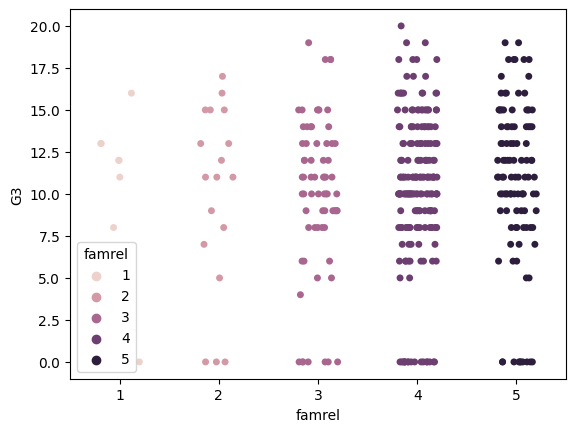

In [4]:
#df_student.plot(kind='scatter',x='famrel',y='G3')
#plt.show()
x = np.arange(0,5,0.1)
y = df_student[['G3']]
#plt.subplots(figsize=[7,5])
sns.stripplot(x = df_student['famrel'],y = df_student['G3'],jitter = 0.2,hue = df_student['famrel'])
sns.reset_defaults()
plt.show()


In [5]:
a1 = np.random.random(len(df_student))
a2 = np.array([True if i<0.8 else False for i in a1 ])
df_student.sample(frac = 0.8)
train = df_student[a2]
test = df_student[~a2]
print(f'length of our train set is {len(train)} and number of our test set is {len(test)}')

length of our train set is 305 and number of our test set is 90


In [6]:
li_model = linear_model.LinearRegression()
print(df_student[['famrel']].shape)
train_model = li_model.fit(train[['famrel']],train['G3'])
w,b = (train_model.coef_,train_model.intercept_)
display(f'our weight is {w} and our bias is {b}')

(395, 1)


'our weight is [0.04056449] and our bias is 10.22533856473864'

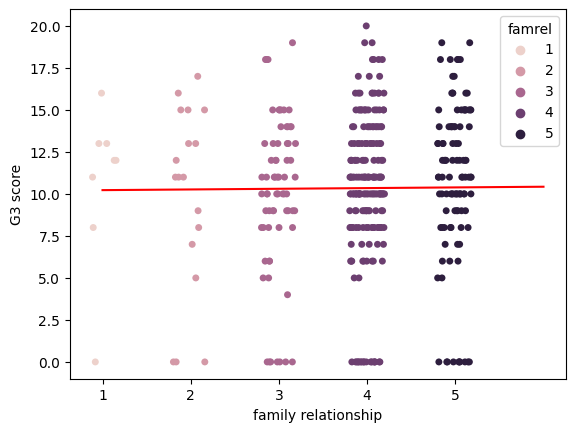

In [7]:
x = np.linspace(0,5,100)
y_pred = x*w+b

sns.stripplot(x = df_student['famrel'],y = df_student['G3'],jitter = 0.2,hue = df_student['famrel'])
plt.plot(x,y_pred, color = 'red')
plt.ylabel('G3 score')
plt.xlabel('family relationship')
plt.show()

In [8]:
y = train['G3'].values
y_pred = train['famrel'].values*w+b
mae = sklearn.metrics.mean_absolute_error(y , y_pred)
mse = sklearn.metrics.mean_squared_error(y,y_pred)
print(f'for this model mae is :{mae} and mse:{mse} for training set')

for this model mae is :3.478615406640787 and mse:21.3629238465353 for training set


In [9]:
x_test = test[['famrel']]
y_test = test['G3']
print(x_test.shape,type(x_test))
y_test_pred = li_model.predict(x_test)
mae_test = sklearn.metrics.mean_absolute_error(y_test , y_test_pred)
mse_test = sklearn.metrics.mean_squared_error(y_test,y_test_pred)
print(f'for this model mae is :{mae_test} and mse:{mse_test} for test set')

(90, 1) <class 'pandas.core.frame.DataFrame'>
for this model mae is :3.270566313687437 and mse:19.426063993422634 for test set


# effect of fathers and mothers job and education on students grades

In [10]:
new_train_x = train[['Mjob','Fjob','Medu','Fedu']]
new_train_x = new_train_x.replace(['other','at_home','services','health','teacher'],[0,1,2,3,4])
new_train_y = train[['G3']]
new_test_x = test[['Mjob','Fjob','Medu','Fedu']]
new_test_x = new_test_x.replace(['other','at_home','services','health','teacher'],[0,1,2,3,4])
new_test_y = test[['G3']]
#new_df.insert(1,'Fjob',df_student[['Fjob']].replace(['other','at_home','services','health','teacher'],[0,1,2,3,4]))
new_train_x

,Mjob,Fjob,Medu,Fedu
0,1,4,4,4
1,1,0,1,1
2,1,0,1,1
3,3,2,4,2
4,0,0,3,3
...,...,...,...,...
390,2,2,2,2
391,2,2,3,1
392,0,0,1,1
393,2,0,3,2


In [11]:
multi_model = li_model.fit(new_train_x,new_train_y)
w , b = multi_model.coef_,multi_model.intercept_
print(f'our wight are: {w[0]} and our bias ais {b}')

our wight are: [ 0.12214445  0.13572326  0.7945848  -0.06432503] and our bias ais [7.99774267]


plotting results

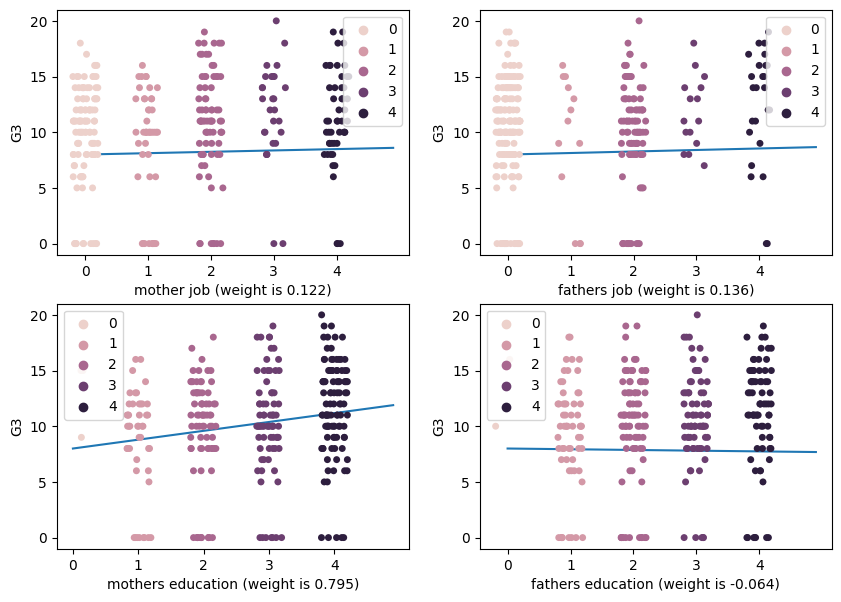

In [55]:
x = np.arange(0,5,0.1)
fig,ax = plt.subplots(2,2,figsize=[10,7])
sns.stripplot(ax = ax[0,0],x = new_train_x['Mjob'],y = new_train_y['G3'] , hue = new_train_x['Mjob'],jitter = 0.2,)
sns.lineplot(ax = ax[0,0],x = x , y = x*w[0,0]+b)
ax[0,0].set_xlabel(f'mother job (weight is {w[0,0]:.3f})')
sns.stripplot(ax = ax[0,1],x = new_train_x['Fjob'],y = new_train_y['G3'] , hue = new_train_x['Fjob'],jitter = 0.2)
sns.lineplot(ax = ax[0,1],x = x , y = x*w[0,1]+b)
ax[0,1].set_xlabel(f'fathers job (weight is {w[0,1]:.3f})')
sns.stripplot(ax = ax[1,0],x = new_train_x['Medu'],y = new_train_y['G3'] , hue = new_train_x['Medu'],jitter = 0.2)
sns.lineplot(ax = ax[1,0],x = x , y = x*w[0,2]+b)
ax[1,0].set_xlabel(f'mothers education (weight is {w[0,2]:.3f})')
sns.stripplot(ax = ax[1,1],x = new_train_x['Fedu'],y = new_train_y['G3'] , hue = new_train_x['Fedu'],jitter = 0.2)
sns.lineplot(ax = ax[1,1],x = x , y = x*w[0,3]+b)
ax[1,1].set_xlabel(f'fathers education (weight is {w[0,3]:.3f})')
plt.show()

**evaluate**

In [13]:
y_pred_multi = multi_model.predict(new_test_x)
print(new_test_y.shape)
mse = np.mean((y_pred_multi-np.array(new_test_y['G3']))**2)
mae = np.mean(abs(y_pred_multi-np.array(new_test_y['G3'])))
print(f'for this multiple regression mse is {mse} and mae is {mae}')

(90, 1)
for this multiple regression mse is 20.432390776202887 and mae is 3.4141441056015687


#D effect of absences on students gardes with regularized polynomial regression

In [14]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import  Ridge, Lasso
from sklearn.metrics import r2_score

In [15]:
train_d_x = train[['absences']]
train_d_y = train[['G3']]
test_d_x = test[['famrel']]
test_d_y = test[['G3']]
train_d_x.head()

,absences
0,6
1,4
2,10
3,2
4,4


## without regularization

poly nomial with degree of 4

In [16]:
poly = PolynomialFeatures(4)
poly_fea_train = poly.fit_transform(train_d_x)
poly_fea_test = poly.fit_transform(test_d_x)
print(f'maximum absences for train set is {poly_fea_train[:,1].max(axis = 0)}')

maximum absences for train set is 75.0


 the model weights and biases are:  [ 0.00000000e+00  7.06714041e-01 -5.63101597e-02  1.28822286e-03
 -8.86317676e-06] [9.08613571]


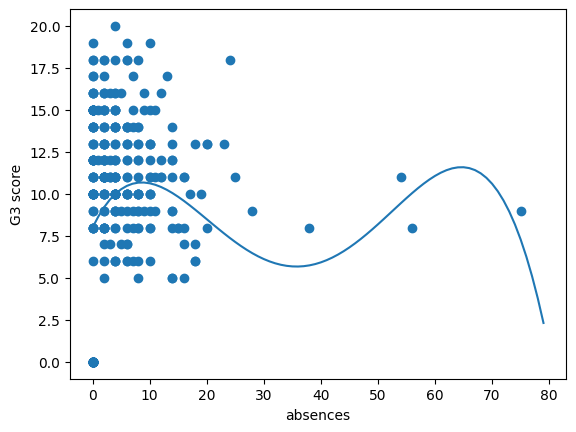

In [17]:
li_poly_reg = linear_model.LinearRegression()
li_poly_reg.fit(poly_fea_train,train_d_y)
x = np.arange(0,80)
w_poly , b_poly = li_poly_reg.coef_,li_poly_reg.intercept_
print(' the model weights and biases are: ',w_poly[0] , b_poly)
plt.scatter(train_d_x,train_d_y)
plt.plot(x,x*w_poly[0,1]+x**2*w_poly[0,2]+x**3*w_poly[0,3]+x**4*w_poly[0,4]+b)

plt.ylabel('G3 score')
plt.xlabel('absences')
plt.show()


In [18]:
y_hat = li_poly_reg.predict(poly_fea_train)
mse = np.mean(((y_hat-train_d_y)**2).values)
mae = np.mean(abs(y_hat-train_d_y).values)
print(f'for linear regression without regularization mse is {mse} and mae is {mae} for training set')

for linear regression without regularization mse is 20.21337555229304 and mae is 3.53455611752932 for training set


evaluate

In [19]:
y_hat = li_poly_reg.predict(poly_fea_test)
mse_te = np.mean(((y_hat-test_d_y)**2).values)
mae_te = np.mean(abs(y_hat-test_d_y).values)
r2 = r2_score(test_d_y,y_hat)
print(f'for linear regression without regularization mse is {mse_te} and mae is {mae_te} \nand r2 score is {r2}for test set')

for linear regression without regularization mse is 19.320770672154865 and mae is 3.249861708036666 
and r2 score is 0.007752661697209673for test set


##with regularization

### L2 regularization

In [20]:
ridge_model = Ridge(alpha=0)
ridge_model.fit(poly_fea_train,train_d_y)
w_ri,b_ri = ridge_model.coef_,ridge_model.intercept_
w_ri,b_ri

(array([[ 0.00000000e+00,  7.06714041e-01, -5.63101597e-02,
          1.28822286e-03, -8.86317676e-06]]),
 array([9.08613571]))

In [21]:
l2_dic ={}
for i in np.arange(0,5,0.5):
  ridge_model = Ridge(alpha=i)
  ridge_model.fit(poly_fea_train,train_d_y)
  y_hat = ridge_model.predict(poly_fea_train)
  mse_tr = np.mean(((y_hat-train_d_y)**2).values)
  mae_tr = np.mean(abs(y_hat-train_d_y).values)
  r2 = r2_score(train_d_y,y_hat)
  l2_dic[f'\u03B1 = {i}'] = [mse_tr,mae_tr,r2]

ridge_model = Ridge(4.5)
ridge_model.fit(poly_fea_train,train_d_y)
w_ri,b_ri = ridge_model.coef_,ridge_model.intercept_
x = np.arange(0,80)
x_poly = PolynomialFeatures(4).fit_transform(x.reshape(-1,1))
plt.scatter(train_d_x,train_d_y)
plt.plot(x , np.dot(x_poly,w_ri.transpose())+b)
plt.xlabel('absences')
plt.ylabel('G3 score')
plt.title('L2 regularization with \u03B1 = 4.5')
pd.DataFrame(l2_dic,index = ['mse','mae','r2 score'] )

,α = 0.0,α = 0.5,α = 1.0,α = 1.5,α = 2.0,α = 2.5,α = 3.0,α = 3.5,α = 4.0,α = 4.5
mse,20.213376,20.213376,20.213378,20.213381,20.213386,20.213391,20.213398,20.213406,20.213416,20.213426
mae,3.534556,3.534432,3.534309,3.534185,3.534062,3.533939,3.533816,3.533693,3.533571,3.533448
r2 score,0.053872,0.053872,0.053872,0.053872,0.053872,0.053872,0.053871,0.053871,0.053870,0.053870


choose α as 4.5

In [22]:
ridge_model = Ridge(4.5)
ridge_model.fit(poly_fea_train,train_d_y)
y_hat1 = ridge_model.predict(poly_fea_test)
mse1 = np.mean(((y_hat1-test_d_y)**2).values)
mae1 = np.mean(abs(y_hat1-test_d_y).values)
r2_ridge = r2_score(test_d_y,y_hat1)
print(f'for linear regression with L2 regularization mse is {mse1} and mae is {mae1} \nand r2 score is {r2_ridge}for test set')

for linear regression with L2 regularization mse is 19.317345383683065 and mae is 3.2493003195417396 
and r2 score is 0.00792857255639512for test set


###L1 regularization

In [23]:
lasso_model = Lasso(alpha=3)
lasso_model.fit(poly_fea_train,train_d_y)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.322e+03, tolerance: 6.516e-01
  model = cd_fast.enet_coordinate_descent(


Lasso(alpha=3)

In [24]:
L1_dic = {}
for i in np.arange(1,6,0.5):
  lasso_model = Lasso(alpha=i)
  lasso_model.fit(poly_fea_train,train_d_y)
  y_hat2 = lasso_model.predict(poly_fea_train).reshape(-1,1)
  mse = np.mean(((y_hat2-train_d_y)**2).values)
  mae = np.mean(abs(y_hat2-train_d_y).values)
  r2 = r2_score(train_d_y,y_hat2)
  L1_dic[f'\u03B1 {i}'] = [mse , mae , r2]

# choose alpha = 1
lasso_model = Lasso(alpha = 1)
lasso_model.fit(poly_fea_train,train_d_y)
w_las , b_las = lasso_model.coef_,lasso_model.intercept_
display(pd.DataFrame(L1_dic,index = ['mse','mae','r2_score']))
print(f'\n\nwights and bias for L1 regulation with \u03B1 = 5 are {w_las} , {b_las}')

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.980e+03, tolerance: 6.516e-01
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.414e+00, tolerance: 6.516e-01
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.703e+03, tolerance: 6.516e

,α 1.0,α 1.5,α 2.0,α 2.5,α 3.0,α 3.5,α 4.0,α 4.5,α 5.0,α 5.5
mse,20.852238,21.123596,21.292974,21.294109,21.295786,21.297681,21.299795,21.302128,21.304680,21.307451
mae,3.468322,3.471783,3.475301,3.474984,3.474584,3.474185,3.473785,3.473386,3.472986,3.472587
r2_score,0.023969,0.011268,0.003340,0.003286,0.003208,0.003119,0.003020,0.002911,0.002792,0.002662




wights and bias for L1 regulation with α = 5 are [ 0.00000000e+00  1.62994030e-01 -7.63377798e-03  9.28585651e-05
 -2.87140139e-07] , [9.95212514]


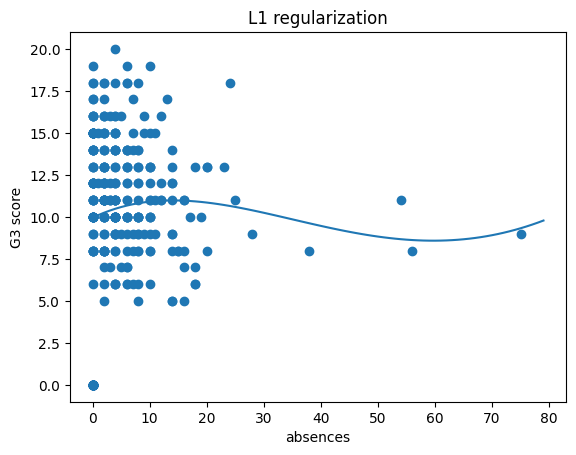

In [56]:
x = np.arange(0,80)
plt.scatter(train_d_x,train_d_y)
poly_x = PolynomialFeatures(4).fit_transform(x.reshape(-1,1))
y_hat = np.dot(poly_x,w_las.transpose())+b_las
plt.plot(x,y_hat)
plt.xlabel('absences')
plt.ylabel('G3 score')
plt.title('L1 regularization')
plt.show()

evaluation

In [26]:
y_hat = lasso_model.predict(poly_fea_test).reshape(-1,1)
mse_las = np.mean(((y_hat-test_d_y)**2).values)
mae_las = np.mean(abs(y_hat-test_d_y).values)
r2_las =  r2_score(test_d_y,y_hat)
print(f'for linear regression with L1 regularization mse is {mse_las} and mae is {mae_las} \nand r2 score is {r2_las}for test set')

for linear regression with L1 regularization mse is 19.304957018523293 and mae is 3.259153965960708 
and r2 score is 0.008564795746675125for test set
